# ISYE 6740 HOMEWORK 1
AUTHOR: JOEL QUEK

jquek7@gatech.edu

---

# Section 1: Concept Questions

In [1]:
import numpy as np

# Define the Laplacian matrix L
L = np.array([
    [ 2, -1, -1,  0,  0],
    [-1,  2, -1,  0,  0],
    [-1, -1,  2,  0,  0],
    [ 0,  0,  0,  1, -1],
    [ 0,  0,  0, -1,  1]
])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(L)

# Find the index(es) of eigenvalues that are close to zero
zero_eigenvalue_indices = np.isclose(eigenvalues, 0)

# Extract the eigenvectors corresponding to zero eigenvalues
zero_eigenvectors = eigenvectors[:, zero_eigenvalue_indices]

print("Eigenvectors corresponding to zero eigenvalues:")
print(zero_eigenvectors)

Eigenvectors corresponding to zero eigenvalues:
[[-0.57735027  0.        ]
 [-0.57735027  0.        ]
 [-0.57735027  0.        ]
 [ 0.          0.70710678]
 [ 0.          0.70710678]]


---

# Section 3: Image Compression Using Clustering [20 Points]

## IMAGES FILEPATHS (ADJUST ACCORDINGLY)

In [2]:
# Adjust the path if necessary
image_paths = ['Glockenbronze.png', 'football.bmp', 'Avengers.jpg']

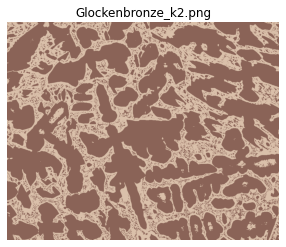

Image: Glockenbronze.png, k: 2, Time: 1.54s, Iterations: 15, Error: 1814032702.28


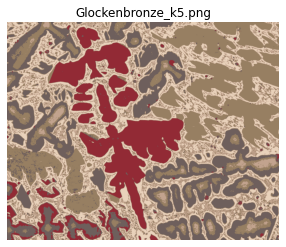

Image: Glockenbronze.png, k: 5, Time: 6.07s, Iterations: 31, Error: 442157631.65


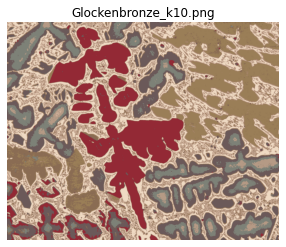

Image: Glockenbronze.png, k: 10, Time: 36.35s, Iterations: 100, Error: 225233885.38


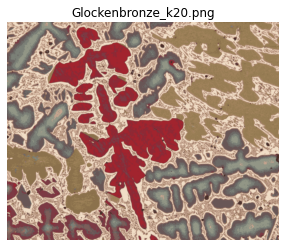

Image: Glockenbronze.png, k: 20, Time: 70.98s, Iterations: 100, Error: 107461951.33


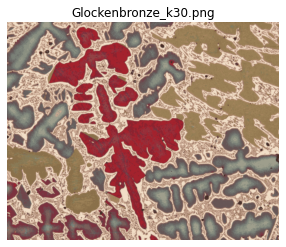

Image: Glockenbronze.png, k: 30, Time: 105.41s, Iterations: 100, Error: 77207353.48


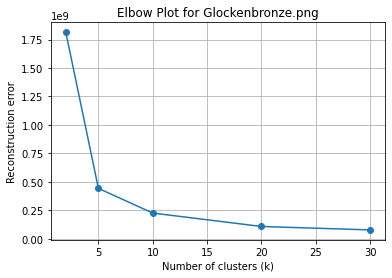

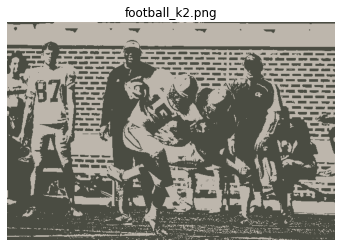

Image: football.bmp, k: 2, Time: 0.69s, Iterations: 23, Error: 1241175017.83


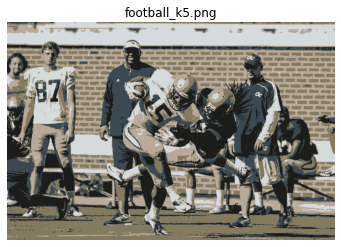

Image: football.bmp, k: 5, Time: 2.05s, Iterations: 34, Error: 368469454.87


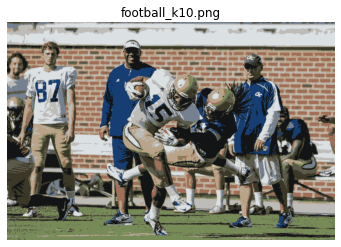

Image: football.bmp, k: 10, Time: 9.86s, Iterations: 92, Error: 184187827.85


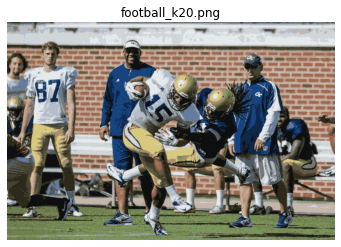

Image: football.bmp, k: 20, Time: 18.68s, Iterations: 91, Error: 100432566.09


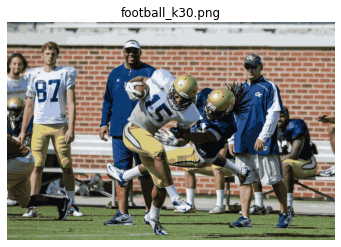

Image: football.bmp, k: 30, Time: 30.59s, Iterations: 100, Error: 70731010.40


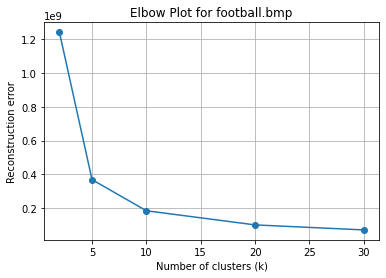

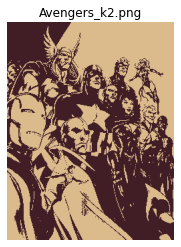

Image: Avengers.jpg, k: 2, Time: 0.08s, Iterations: 7, Error: 496551149.53


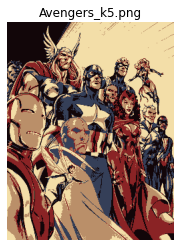

Image: Avengers.jpg, k: 5, Time: 1.75s, Iterations: 86, Error: 193507314.59


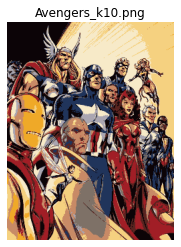

Image: Avengers.jpg, k: 10, Time: 1.93s, Iterations: 54, Error: 93900208.92


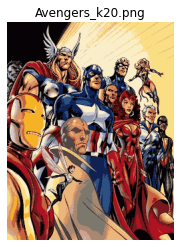

Image: Avengers.jpg, k: 20, Time: 5.14s, Iterations: 77, Error: 51344735.68


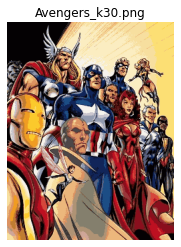

Image: Avengers.jpg, k: 30, Time: 9.86s, Iterations: 100, Error: 33156486.10


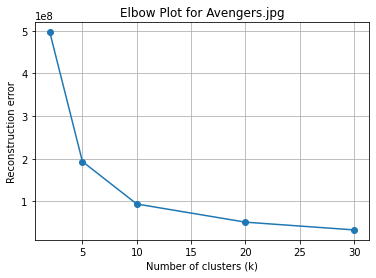

Total elapsed time for processing all images: 309.90s


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Set the random seed for reproducibility
np.random.seed(903923760)

def load_image(path):
    """ Load an image and convert it to RGB. """
    img = plt.imread(path)
    if img.dtype == np.float32:  # normalize if needed
        img = (img * 255).astype(np.uint8)
    pixels = img.reshape(-1, 3)
    return pixels, img.shape

def initialize_centroids(data, k):
    """ Initialize centroids randomly from the dataset. """
    indices = np.random.choice(data.shape[0], size=k, replace=False)
    return data[indices]

def assign_clusters(data, centroids):
    """ Assign each data point to the nearest centroid. """
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(data, assignments, k):
    """ Recompute centroids as mean of assigned data points. """
    return np.array([data[assignments == i].mean(axis=0) for i in range(k)])

def k_means(data, k, max_iters=100, tolerance=1e-4):
    """ The K-means algorithm. """
    centroids = initialize_centroids(data, k)
    for iteration in range(max_iters):
        old_centroids = centroids
        assignments = assign_clusters(data, centroids)
        centroids = update_centroids(data, assignments, k)
        if np.all(np.linalg.norm(centroids - old_centroids, axis=1) < tolerance):
            break
    return assignments, centroids, iteration + 1

def k_means_with_timing(data, k, max_iterations=100, tolerance=1e-4):
    """ The K-means algorithm with timing. """
    start_time = time.time()
    assignments, centroids, iterations = k_means(data, k, max_iterations, tolerance)
    elapsed_time = time.time() - start_time
    return assignments, centroids, iterations, elapsed_time

def reconstruction_error(pixels, centroids, assignments):
    """ Calculate the reconstruction error. """
    reconstructed = np.array([centroids[i] for i in assignments])
    return np.sum((pixels - reconstructed) ** 2)

def save_compressed_image(pixels, centroids, cluster_assignment, image_shape, output_path):
    """ Save and display the compressed image. """
    compressed_pixels = np.array([centroids[i] for i in cluster_assignment])
    compressed_image = compressed_pixels.reshape(image_shape)
    plt.imsave(output_path, compressed_image.astype(np.uint8))
    plt.imshow(compressed_image.astype(np.uint8))
    plt.title(output_path)
    plt.axis('off')
    plt.show()

# Paths to the images
#image_paths = ['/content/Glockenbronze.png', '/content/football.bmp', '/content/Avengers.jpg']
k_values = [2, 5, 10, 20, 30]

total_start_time = time.time()  # Start the total timer

for image_path in image_paths:
    pixels, image_shape = load_image(image_path)
    reconstruction_errors = []
    iterations_list = []

    for k in k_values:
        cluster_assignment, centroids, iterations, elapsed_time = k_means_with_timing(pixels, k)
        error = reconstruction_error(pixels, centroids, cluster_assignment)
        reconstruction_errors.append(error)
        iterations_list.append(iterations)

        output_path = f"{image_path.split('.')[0]}_k{k}.png"
        save_compressed_image(pixels, centroids, cluster_assignment, image_shape, output_path)

        print(f"Image: {image_path}, k: {k}, Time: {elapsed_time:.2f}s, Iterations: {iterations}, Error: {error:.2f}")

    # Plot the elbow plot
    plt.figure()
    plt.plot(k_values, reconstruction_errors, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Reconstruction error')
    plt.title(f'Elbow Plot for {image_path}')
    plt.grid(True)
    plt.show()

total_elapsed_time = time.time() - total_start_time  # End the total timer
print(f"Total elapsed time for processing all images: {total_elapsed_time:.2f}s")


---

# Section 4: MNIST Dataset clustering [25 points]

## MNIST FILEPATH (ADJUST ACCORDINGLY)

In [4]:
# Adjust the path if necessary
mat_file_path = 'mnist_10digits.mat'  # Adjust the path if necessary

## View MNIST File

In [5]:
import scipy.io as sio
import pandas as pd

# Load the .mat file
#mat_file_path = '/content/mnist_10digits.mat'  # Adjust the path if necessary
data = sio.loadmat(mat_file_path)

# Display the keys in the loaded data
print("Keys in the .mat file:", data.keys())

# Access the training data
X_train = data['xtrain'].astype(np.float64)  # Feature data
y_train = data['ytrain'].flatten()  # Labels

# Access the test data
X_test = data['xtest'].astype(np.float64)  # Feature data
y_test = data['ytest'].flatten()  # Labels

# Create a DataFrame for the training data
df_train = pd.DataFrame(X_train)
df_train['label'] = y_train

# Display the first few rows of the training DataFrame
print(df_train.head())


Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'xtrain', 'ytrain', 'xtest', 'ytest'])
     0    1    2    3    4    5    6    7    8    9  ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  label  
0  0.0  0.0  0.0  0.0  0.0      5  
1  0.0  0.0  0.0  0.0  0.0      0  
2  0.0  0.0  0.0  0.0  0.0      4  
3  0.0  0.0  0.0  0.0  0.0      1  
4  0.0  0.0  0.0  0.0  0.0      9  

[5 rows x 785 columns]


## Squared-$l_2$ Norm

In [6]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(903923760)

def load_mnist_data(mat_file_path):
    """Load MNIST training data from a MATLAB .mat file."""
    mat = scipy.io.loadmat(mat_file_path)
    X = mat['xtrain'].astype(np.float64)  # Use 'xtrain' for the image data
    y = mat['ytrain'].flatten()  # Use 'ytrain' for the labels and flatten the array
    return X, y

def initialize_centroids(data, k):
    """Randomly initialize centroids."""
    indices = np.random.choice(data.shape[0], size=k, replace=False)
    return data[indices]

def assign_clusters(data, centroids):
    """Assign each data point to the nearest centroid using Euclidean distance."""
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, assignments, k):
    """Update centroids as the mean of assigned data points."""
    return np.array([data[assignments == i].mean(axis=0) for i in range(k)])

def kmeans(data, k, max_iters=100):
    """K-means clustering algorithm using the squared-L2 norm."""
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        assignments = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, assignments, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return assignments, centroids

def calculate_purity_scores(assignments, true_labels, k):
    """Calculate the purity score for each cluster."""
    purity_scores = []
    for i in range(k):
        cluster_labels = true_labels[assignments == i]
        most_common = np.bincount(cluster_labels).argmax()
        purity = (cluster_labels == most_common).sum() / len(cluster_labels)
        purity_scores.append(purity)
        print(f"Purity Score for Cluster {i}: {purity}")
    return purity_scores

if __name__ == "__main__":
    # Path to the .mat file containing the MNIST dataset
    #mat_file_path = '/content/mnist_10digits.mat'  # Ensure this is correctly set

    # Load and prepare data
    X, y = load_mnist_data(mat_file_path)

    # Number of clusters
    k = 10  # Since there are 10 digits

    # Perform K-means clustering
    assignments, centroids = kmeans(X, k)
    purity_scores = calculate_purity_scores(assignments, y, k)

Purity Score for Cluster 0: 0.4226511071214841
Purity Score for Cluster 1: 0.9397106109324759
Purity Score for Cluster 2: 0.5572447447447447
Purity Score for Cluster 3: 0.676358349990914
Purity Score for Cluster 4: 0.9032536091359621
Purity Score for Cluster 5: 0.8510204081632653
Purity Score for Cluster 6: 0.4411556436765331
Purity Score for Cluster 7: 0.4041374214998153
Purity Score for Cluster 8: 0.3418176787937474
Purity Score for Cluster 9: 0.49987136609210187


## Manhattan Distance

In [7]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(903923760)

def load_mnist_data(mat_file_path):
    """ Load MNIST training data from a MATLAB .mat file. """
    mat = scipy.io.loadmat(mat_file_path)
    X = mat['xtrain'].astype(np.float64)  # Use 'xtrain' for the image data
    y = mat['ytrain'].flatten()  # Use 'ytrain' for the labels and flatten the array
    return X, y

def initialize_centroids(data, k):
    """ Randomly initialize centroids. """
    indices = np.random.choice(data.shape[0], size=k, replace=False)
    return data[indices]

def assign_clusters(data, centroids, use_manhattan=False):
    """ Assign each data point to the nearest centroid using Euclidean or Manhattan distance. """
    if use_manhattan:
        distances = np.sum(np.abs(data[:, np.newaxis] - centroids), axis=2)
    else:
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, assignments, k, use_manhattan=False):
    """ Update centroids as the mean or median of assigned data points, depending on the distance used. """
    if use_manhattan:
        return np.array([np.median(data[assignments == i], axis=0) for i in range(k)])
    else:
        return np.array([data[assignments == i].mean(axis=0) for i in range(k)])

def kmeans(data, k, use_manhattan=False, max_iters=100):
    """ K-means clustering algorithm using either Euclidean or Manhattan distance. """
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        assignments = assign_clusters(data, centroids, use_manhattan)
        new_centroids = update_centroids(data, assignments, k, use_manhattan)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return assignments, centroids

def calculate_purity_scores(assignments, true_labels, k):
    """ Calculate the purity score for each cluster. """
    purity_scores = []
    for i in range(k):
        cluster_labels = true_labels[assignments == i]
        most_common = np.bincount(cluster_labels).argmax()
        purity = (cluster_labels == most_common).sum() / len(cluster_labels)
        purity_scores.append(purity)
        print(f"Purity Score for Cluster {i} using Manhattan Distance: {purity}")
    return purity_scores

# Path to the .mat file containing the MNIST dataset
#mat_file_path = '/content/mnist_10digits.mat'  # Ensure this is correctly set

# Load and prepare data
X, y = load_mnist_data(mat_file_path)

# Number of clusters
k = 10  # Since there are 10 digits

# Perform K-means clustering using Manhattan distance
assignments_manhattan, centroids_manhattan = kmeans(X, k, use_manhattan=True)
purity_scores_manhattan = calculate_purity_scores(assignments_manhattan, y, k)


Purity Score for Cluster 0 using Manhattan Distance: 0.5102136103653554
Purity Score for Cluster 1 using Manhattan Distance: 0.9419340262087664
Purity Score for Cluster 2 using Manhattan Distance: 0.7390857729840781
Purity Score for Cluster 3 using Manhattan Distance: 0.4819725864123957
Purity Score for Cluster 4 using Manhattan Distance: 0.8008196721311476
Purity Score for Cluster 5 using Manhattan Distance: 0.8631547969393761
Purity Score for Cluster 6 using Manhattan Distance: 0.618554429263993
Purity Score for Cluster 7 using Manhattan Distance: 0.4438938053097345
Purity Score for Cluster 8 using Manhattan Distance: 0.3546345447121274
Purity Score for Cluster 9 using Manhattan Distance: 0.3776815957847196


---

# Section 5: Political blogs dataset [bonus, 10 points]

## NODES AND EDGES FILEPATHS (ADJUST ACCORDINGLY)

In [8]:
# Adjust the path if necessary
nodes_path = 'nodes.txt'
edges_path = 'edges.txt'

## Question 1

In [9]:
import numpy as np
import pandas as pd
import networkx as nx
import scipy.linalg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(903923760)

def load_data(nodes_path, edges_path):
    nodes = pd.read_csv(nodes_path, header=None, delim_whitespace=True, usecols=[0, 2], names=['node', 'label'])
    edges = pd.read_csv(edges_path, header=None, delim_whitespace=True, names=['source', 'target'])
    return nodes, edges

def preprocess_data(nodes, edges):
    # Create undirected graph
    G = nx.Graph()
    G.add_nodes_from(nodes['node'])
    G.add_edges_from(edges.values)

    # Remove isolated nodes
    isolated_nodes = list(nx.isolates(G))
    G.remove_nodes_from(isolated_nodes)
    nodes = nodes[nodes['node'].isin(G.nodes())]  # Keep only nodes in the largest connected component
    return G, nodes

def spectral_clustering(G, k):
    # Construct the Laplacian matrix
    L = nx.laplacian_matrix(G).toarray()
    # Eigen decomposition of the Laplacian
    eigenvalues, eigenvectors = scipy.linalg.eigh(L, subset_by_index=[0, k-1])
    # Use the k smallest eigenvectors
    X = eigenvectors[:, 1:k]
    # Normalize rows to unit length
    X = X / np.linalg.norm(X, axis=1, keepdims=True)
    # k-means on rows of X
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    return kmeans.labels_

def calculate_purity(labels, nodes):
    nodes['cluster'] = labels
    overall_purity = 0
    for cluster in sorted(nodes['cluster'].unique()):
        cluster_labels = nodes[nodes['cluster'] == cluster]['label']
        most_common = cluster_labels.mode()[0]
        purity = (cluster_labels == most_common).sum() / cluster_labels.size
        overall_purity += purity * cluster_labels.size / nodes.shape[0]
        print(f'Purity for cluster {cluster}: {purity:.4f}')
    print(f'Overall Purity: {overall_purity:.4f}')
    return overall_purity

# File paths
#nodes_path = '/content/nodes.txt'
#edges_path = '/content/edges.txt'

# Load data
nodes, edges = load_data(nodes_path, edges_path)

# Process data and create graph
G, nodes = preprocess_data(nodes, edges)

# Perform spectral clustering and calculate purity for different values of k
k_values = [2, 5, 10, 30, 50]
for k in k_values:
    print(f"\nRunning spectral clustering for k={k}")
    labels = spectral_clustering(G, k)
    calculate_purity(labels, nodes.copy())



Running spectral clustering for k=2


<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
C:\Users\redoc\AppData\Local\Temp\ipykernel_25884\2151410242.py:37: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


Purity for cluster 0: 0.5196
Overall Purity: 0.5196

Running spectral clustering for k=5
Purity for cluster 0: 0.5190
Purity for cluster 1: 0.8000
Purity for cluster 2: 1.0000
Purity for cluster 3: 1.0000
Purity for cluster 4: 1.0000
Overall Purity: 0.5229

Running spectral clustering for k=10


<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


Purity for cluster 0: 0.5179
Purity for cluster 1: 1.0000
Purity for cluster 2: 1.0000
Purity for cluster 3: 0.8000
Purity for cluster 4: 1.0000
Purity for cluster 5: 1.0000
Purity for cluster 6: 0.7000
Purity for cluster 7: 0.7213
Purity for cluster 8: 1.0000
Purity for cluster 9: 1.0000
Overall Purity: 0.5417

Running spectral clustering for k=30


<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


Purity for cluster 0: 0.9595
Purity for cluster 1: 1.0000
Purity for cluster 2: 0.7419
Purity for cluster 3: 1.0000
Purity for cluster 4: 0.9535
Purity for cluster 5: 1.0000
Purity for cluster 6: 0.6667
Purity for cluster 7: 1.0000
Purity for cluster 8: 1.0000
Purity for cluster 9: 0.8000
Purity for cluster 10: 1.0000
Purity for cluster 11: 1.0000
Purity for cluster 12: 0.7500
Purity for cluster 13: 1.0000
Purity for cluster 14: 0.9713
Purity for cluster 15: 1.0000
Purity for cluster 16: 0.8000
Purity for cluster 17: 1.0000
Purity for cluster 18: 0.8000
Purity for cluster 19: 1.0000
Purity for cluster 20: 1.0000
Purity for cluster 21: 1.0000
Purity for cluster 22: 1.0000
Purity for cluster 23: 1.0000
Purity for cluster 24: 1.0000
Purity for cluster 25: 1.0000
Purity for cluster 26: 0.6667
Purity for cluster 27: 1.0000
Purity for cluster 28: 1.0000
Purity for cluster 29: 1.0000
Overall Purity: 0.9559

Running spectral clustering for k=50


<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


Purity for cluster 0: 1.0000
Purity for cluster 1: 0.9413
Purity for cluster 2: 0.6250
Purity for cluster 3: 1.0000
Purity for cluster 4: 0.7778
Purity for cluster 5: 1.0000
Purity for cluster 6: 1.0000
Purity for cluster 7: 1.0000
Purity for cluster 8: 1.0000
Purity for cluster 9: 1.0000
Purity for cluster 10: 1.0000
Purity for cluster 11: 0.6000
Purity for cluster 12: 0.9716
Purity for cluster 13: 1.0000
Purity for cluster 14: 1.0000
Purity for cluster 15: 0.7500
Purity for cluster 16: 1.0000
Purity for cluster 17: 0.8000
Purity for cluster 18: 0.8000
Purity for cluster 19: 1.0000
Purity for cluster 20: 1.0000
Purity for cluster 21: 0.8000
Purity for cluster 22: 1.0000
Purity for cluster 23: 1.0000
Purity for cluster 24: 1.0000
Purity for cluster 25: 1.0000
Purity for cluster 26: 1.0000
Purity for cluster 27: 1.0000
Purity for cluster 28: 0.6667
Purity for cluster 29: 1.0000
Purity for cluster 30: 0.7500
Purity for cluster 31: 0.5455
Purity for cluster 32: 1.0000
Purity for cluster 3


Running spectral clustering for k=2


<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.



Running spectral clustering for k=5


<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.



Running spectral clustering for k=10


<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.



Running spectral clustering for k=30


<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.



Running spectral clustering for k=50


<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


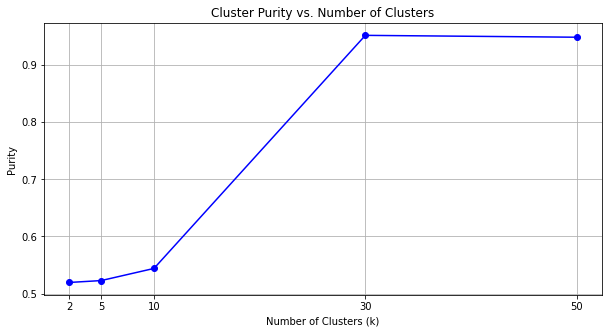

In [10]:
import numpy as np
import pandas as pd
import networkx as nx
import scipy.linalg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(903923760)

def load_data(nodes_path, edges_path):
    nodes = pd.read_csv(nodes_path, header=None, delim_whitespace=True, usecols=[0, 2], names=['node', 'label'])
    edges = pd.read_csv(edges_path, header=None, delim_whitespace=True, names=['source', 'target'])
    return nodes, edges

def preprocess_data(nodes, edges):
    G = nx.Graph()
    G.add_nodes_from(nodes['node'])
    G.add_edges_from(edges.values)
    isolated_nodes = list(nx.isolates(G))
    G.remove_nodes_from(isolated_nodes)
    nodes = nodes[nodes['node'].isin(G.nodes())]
    return G, nodes

def spectral_clustering(G, k):
    L = nx.laplacian_matrix(G).toarray()
    eigenvalues, eigenvectors = scipy.linalg.eigh(L, subset_by_index=[1, k])  # Skip the first trivial eigenvector
    X = eigenvectors[:, :k]
    X = X / np.linalg.norm(X, axis=1, keepdims=True)
    kmeans = KMeans(n_clusters=k, random_state=903923760).fit(X)
    return kmeans.labels_

def calculate_purity(labels, nodes):
    nodes['cluster'] = labels
    overall_purity = 0
    for cluster in sorted(nodes['cluster'].unique()):
        cluster_labels = nodes[nodes['cluster'] == cluster]['label']
        most_common = cluster_labels.mode()[0]
        purity = (cluster_labels == most_common).sum() / cluster_labels.size
        overall_purity += purity * cluster_labels.size / nodes.shape[0]
    return overall_purity

# File paths
#nodes_path = '/content/nodes.txt'
#edges_path = '/content/edges.txt'

# Load data
nodes, edges = load_data(nodes_path, edges_path)

# Process data and create graph
G, nodes = preprocess_data(nodes, edges)

# List to store purity results
purity_scores = []
k_values = [2, 5, 10, 30, 50]

for k in k_values:
    print(f"\nRunning spectral clustering for k={k}")
    labels = spectral_clustering(G, k)
    purity = calculate_purity(labels, nodes.copy())
    purity_scores.append(purity)

# Plotting the purity scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, purity_scores, marker='o', linestyle='-', color='b')
plt.title('Cluster Purity vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Purity')
plt.grid(True)
plt.xticks(k_values)
plt.show()


## Question 2 - Mismatch Rate

In [11]:
import numpy as np
import pandas as pd
import networkx as nx
import scipy.linalg
from sklearn.cluster import KMeans

np.random.seed(903923760)

def load_data(nodes_path, edges_path):
    nodes = pd.read_csv(nodes_path, header=None, delim_whitespace=True, usecols=[0, 2], names=['node', 'label'])
    edges = pd.read_csv(edges_path, header=None, delim_whitespace=True, names=['source', 'target'])
    return nodes, edges

def preprocess_data(nodes, edges):
    # Create undirected graph
    G = nx.Graph()
    G.add_nodes_from(nodes['node'])
    G.add_edges_from(edges.values)
    # Remove isolated nodes
    isolated_nodes = list(nx.isolates(G))
    G.remove_nodes_from(isolated_nodes)
    nodes = nodes[nodes['node'].isin(G.nodes())]  # Update nodes dataframe
    return G, nodes

def spectral_clustering(G, k):
    # Construct Laplacian matrix
    L = nx.laplacian_matrix(G).toarray()
    # Eigen decomposition
    eigenvalues, eigenvectors = scipy.linalg.eigh(L)
    # Use k smallest eigenvectors
    X = eigenvectors[:, :k]
    # Normalize rows to unit length
    X = X / np.linalg.norm(X, axis=1, keepdims=True)
    # k-means on rows of X
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    return kmeans.labels_

def calculate_mismatch_rate(labels, nodes):
    nodes['cluster'] = labels
    mismatch_rates = []
    for cluster in sorted(nodes['cluster'].unique()):
        cluster_labels = nodes[nodes['cluster'] == cluster]['label']
        most_common = cluster_labels.mode()[0]
        mismatch = 1 - (cluster_labels == most_common).sum() / cluster_labels.size
        mismatch_rates.append(mismatch)
        print(f'Mismatch rate for cluster {cluster}: {mismatch:.4f}')
    return mismatch_rates

# File paths
#nodes_path = '/content/nodes.txt'
#edges_path = '/content/edges.txt'

# Load data
nodes, edges = load_data(nodes_path, edges_path)

# Process data and create graph
G, nodes = preprocess_data(nodes, edges)

# Test different values of k
k_values = [2, 5, 10, 30, 50]
for k in k_values:
    print(f"\nRunning spectral clustering for k={k}")
    labels = spectral_clustering(G, k)
    mismatch_rates = calculate_mismatch_rate(labels, nodes.copy())



Running spectral clustering for k=2


<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


Mismatch rate for cluster 0: 0.4795
Mismatch rate for cluster 1: 0.0000

Running spectral clustering for k=5


<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


Mismatch rate for cluster 0: 0.4802
Mismatch rate for cluster 1: 0.2000
Mismatch rate for cluster 2: 0.0000
Mismatch rate for cluster 3: 0.0000
Mismatch rate for cluster 4: 0.0000

Running spectral clustering for k=10


<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


Mismatch rate for cluster 0: 0.4812
Mismatch rate for cluster 1: 0.2000
Mismatch rate for cluster 2: 0.0000
Mismatch rate for cluster 3: 0.0000
Mismatch rate for cluster 4: 0.0000
Mismatch rate for cluster 5: 0.0000
Mismatch rate for cluster 6: 0.0000
Mismatch rate for cluster 7: 0.0000
Mismatch rate for cluster 8: 0.3000
Mismatch rate for cluster 9: 0.2787

Running spectral clustering for k=30


<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


Mismatch rate for cluster 0: 0.0000
Mismatch rate for cluster 1: 0.0465
Mismatch rate for cluster 2: 0.2000
Mismatch rate for cluster 3: 0.2581
Mismatch rate for cluster 4: 0.0000
Mismatch rate for cluster 5: 0.0288
Mismatch rate for cluster 6: 0.0355
Mismatch rate for cluster 7: 0.4545
Mismatch rate for cluster 8: 0.0000
Mismatch rate for cluster 9: 0.0000
Mismatch rate for cluster 10: 0.2000
Mismatch rate for cluster 11: 0.2000
Mismatch rate for cluster 12: 0.2500
Mismatch rate for cluster 13: 0.0000
Mismatch rate for cluster 14: 0.2000
Mismatch rate for cluster 15: 0.0000
Mismatch rate for cluster 16: 0.0000
Mismatch rate for cluster 17: 0.0000
Mismatch rate for cluster 18: 0.0000
Mismatch rate for cluster 19: 0.0000
Mismatch rate for cluster 20: 0.0000
Mismatch rate for cluster 21: 0.3750
Mismatch rate for cluster 22: 0.0000
Mismatch rate for cluster 23: 0.0000
Mismatch rate for cluster 24: 0.0000
Mismatch rate for cluster 25: 0.0000
Mismatch rate for cluster 26: 0.0000
Mismatch ra

<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


Mismatch rate for cluster 0: 0.0000
Mismatch rate for cluster 1: 0.0405
Mismatch rate for cluster 2: 0.0000
Mismatch rate for cluster 3: 0.0000
Mismatch rate for cluster 4: 0.2222
Mismatch rate for cluster 5: 0.0250
Mismatch rate for cluster 6: 0.0000
Mismatch rate for cluster 7: 0.2000
Mismatch rate for cluster 8: 0.0000
Mismatch rate for cluster 9: 0.0000
Mismatch rate for cluster 10: 0.4545
Mismatch rate for cluster 11: 0.0000
Mismatch rate for cluster 12: 0.0000
Mismatch rate for cluster 13: 0.2000
Mismatch rate for cluster 14: 0.0000
Mismatch rate for cluster 15: 0.0000
Mismatch rate for cluster 16: 0.0000
Mismatch rate for cluster 17: 0.2500
Mismatch rate for cluster 18: 0.2000
Mismatch rate for cluster 19: 0.0000
Mismatch rate for cluster 20: 0.3333
Mismatch rate for cluster 21: 0.4286
Mismatch rate for cluster 22: 0.0000
Mismatch rate for cluster 23: 0.0000
Mismatch rate for cluster 24: 0.0000
Mismatch rate for cluster 25: 0.0000
Mismatch rate for cluster 26: 0.0000
Mismatch ra


Running spectral clustering for k=2


<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


Mismatch rate for cluster 0: 0.4815
Mismatch rate for cluster 1: 0.2000
Total Mismatch Rate: 0.4804

Running spectral clustering for k=5


<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


Mismatch rate for cluster 0: 0.4810
Mismatch rate for cluster 1: 0.2000
Mismatch rate for cluster 2: 0.0000
Mismatch rate for cluster 3: 0.0000
Mismatch rate for cluster 4: 0.0000
Total Mismatch Rate: 0.4771

Running spectral clustering for k=10


<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


Mismatch rate for cluster 0: 0.4821
Mismatch rate for cluster 1: 0.2456
Mismatch rate for cluster 2: 0.0000
Mismatch rate for cluster 3: 0.2000
Mismatch rate for cluster 4: 0.0000
Mismatch rate for cluster 5: 0.2500
Mismatch rate for cluster 6: 0.0000
Mismatch rate for cluster 7: 0.5000
Mismatch rate for cluster 8: 0.0000
Mismatch rate for cluster 9: 0.3000
Total Mismatch Rate: 0.4583

Running spectral clustering for k=30


<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


Mismatch rate for cluster 0: 0.0405
Mismatch rate for cluster 1: 0.0288
Mismatch rate for cluster 2: 0.0000
Mismatch rate for cluster 3: 0.0000
Mismatch rate for cluster 4: 0.3333
Mismatch rate for cluster 5: 0.2581
Mismatch rate for cluster 6: 0.0000
Mismatch rate for cluster 7: 0.0476
Mismatch rate for cluster 8: 0.2000
Mismatch rate for cluster 9: 0.2000
Mismatch rate for cluster 10: 0.0000
Mismatch rate for cluster 11: 0.2500
Mismatch rate for cluster 12: 0.0000
Mismatch rate for cluster 13: 0.0000
Mismatch rate for cluster 14: 0.0000
Mismatch rate for cluster 15: 0.0000
Mismatch rate for cluster 16: 0.2000
Mismatch rate for cluster 17: 0.0000
Mismatch rate for cluster 18: 0.3333
Mismatch rate for cluster 19: 0.0000
Mismatch rate for cluster 20: 0.0000
Mismatch rate for cluster 21: 0.0000
Mismatch rate for cluster 22: 0.0000
Mismatch rate for cluster 23: 0.0000
Mismatch rate for cluster 24: 0.0000
Mismatch rate for cluster 25: 0.0000
Mismatch rate for cluster 26: 0.0000
Mismatch ra

<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


Mismatch rate for cluster 0: 0.0000
Mismatch rate for cluster 1: 0.0380
Mismatch rate for cluster 2: 0.0000
Mismatch rate for cluster 3: 0.2500
Mismatch rate for cluster 4: 0.0000
Mismatch rate for cluster 5: 0.3750
Mismatch rate for cluster 6: 0.0000
Mismatch rate for cluster 7: 0.3750
Mismatch rate for cluster 8: 0.0000
Mismatch rate for cluster 9: 0.0000
Mismatch rate for cluster 10: 0.0000
Mismatch rate for cluster 11: 0.2000
Mismatch rate for cluster 12: 0.5000
Mismatch rate for cluster 13: 0.0000
Mismatch rate for cluster 14: 0.2500
Mismatch rate for cluster 15: 0.2000
Mismatch rate for cluster 16: 0.0000
Mismatch rate for cluster 17: 0.2000
Mismatch rate for cluster 18: 0.0000
Mismatch rate for cluster 19: 0.0000
Mismatch rate for cluster 20: 0.0000
Mismatch rate for cluster 21: 0.0000
Mismatch rate for cluster 22: 0.0283
Mismatch rate for cluster 23: 0.0000
Mismatch rate for cluster 24: 0.2308
Mismatch rate for cluster 25: 0.0000
Mismatch rate for cluster 26: 0.3333
Mismatch ra

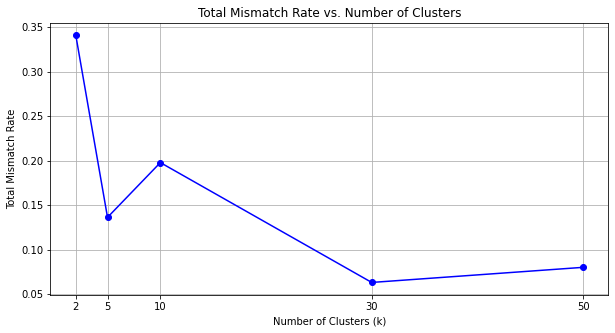

In [12]:
import numpy as np
import pandas as pd
import networkx as nx
import scipy.linalg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(903923760)

def load_data(nodes_path, edges_path):
    nodes = pd.read_csv(nodes_path, header=None, delim_whitespace=True, usecols=[0, 2], names=['node', 'label'])
    edges = pd.read_csv(edges_path, header=None, delim_whitespace=True, names=['source', 'target'])
    return nodes, edges

def preprocess_data(nodes, edges):
    G = nx.Graph()
    G.add_nodes_from(nodes['node'])
    G.add_edges_from(edges.values)
    isolated_nodes = list(nx.isolates(G))
    G.remove_nodes_from(isolated_nodes)
    nodes = nodes[nodes['node'].isin(G.nodes())]
    return G, nodes

def spectral_clustering(G, k):
    L = nx.laplacian_matrix(G).toarray()
    eigenvalues, eigenvectors = scipy.linalg.eigh(L, subset_by_index=[1, k])
    X = eigenvectors[:, :k]
    X = X / np.linalg.norm(X, axis=1, keepdims=True)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    return kmeans.labels_

def calculate_mismatch_rate(labels, nodes):
    nodes['cluster'] = labels
    mismatch_rates = []
    total_mismatches = 0
    total_elements = len(labels)
    for cluster in sorted(nodes['cluster'].unique()):
        cluster_labels = nodes[nodes['cluster'] == cluster]['label']
        most_common = cluster_labels.mode()[0]
        mismatch = 1 - (cluster_labels == most_common).sum() / cluster_labels.size
        total_mismatches += cluster_labels.size * mismatch
        mismatch_rates.append(mismatch)
        print(f'Mismatch rate for cluster {cluster}: {mismatch:.4f}')
    overall_mismatch_rate = total_mismatches / total_elements
    print(f'Total Mismatch Rate: {overall_mismatch_rate:.4f}')
    return mismatch_rates

# File paths
#nodes_path = '/content/nodes.txt'
#edges_path = '/content/edges.txt'

# Load data
nodes, edges = load_data(nodes_path, edges_path)

# Process data and create graph
G, nodes = preprocess_data(nodes, edges)

# Testing different values of k
k_values = [2, 5, 10, 30, 50]
total_mismatch_rates = []

for k in k_values:
    print(f"\nRunning spectral clustering for k={k}")
    labels = spectral_clustering(G, k)
    mismatch_rates = calculate_mismatch_rate(labels, nodes.copy())
    total_mismatch_rates.append(np.mean(mismatch_rates))

# Plotting mismatch rates
plt.figure(figsize=(10, 5))
plt.plot(k_values, total_mismatch_rates, marker='o', linestyle='-', color='b')
plt.title('Total Mismatch Rate vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Total Mismatch Rate')
plt.grid(True)
plt.xticks(k_values)
plt.show()


---